## Post process analysis
- Load the turn by turn data
- Emittance evolution 
- Tune shift with amplitude

In [1]:
import os
import sys
import numpy as np
from math import *
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import PyNAFF as pnf
sys.path.append('./utils')
from my_functions import *

### Plotting parameters

In [2]:
params = {'legend.fontsize': 12,
          'figure.figsize': (8.5, 6.5),
          'axes.labelsize': 18,
          'axes.titlesize': 18,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

In [3]:
f_rev = 11.2455e3  # revolution frequency [Hz]
# Relativistic parameters
gamma_rel = 7460.52252807237 # from madx twiss
beta_rel = sqrt(1-(1/gamma_rel)**2)
# Twiss parameters
twiss = DottedDict()
twiss.beta_x = 115.75 #at IP3 #obtained from madx twiss. should be crossed check
twiss.beta_y = 1. 
twiss.alpha_x = 0 
twiss.alpha_y = 0 
twiss.gamma_x = (1+twiss.alpha_x**2)/twiss.beta_x
twiss.gamma_y = (1+twiss.alpha_y**2)/twiss.beta_y
ex_norm = 2.5e-6
ex_geom = ex_norm/(beta_rel*gamma_rel)
#ex_geom = 0.047#*1e-9 #for SCC
sigma_x = sqrt(twiss.beta_x*ex_geom)
sigma_px = sqrt(ex_geom/twiss.beta_x)
print(sigma_x, sigma_px)

0.00019694541882215593 1.7014723008393603e-06


### Study parameters

In [4]:
particles = 15000
turns = 1000
variables_string_list = ['v1', 'v2', 'v3']
studies_names = []
for i in variables_string_list:
    studies_names.append('Qx0.78_noise0.05_BB0.03_feedback0.2_betax115.75_H_particles15000_turns1000_{}.pkl'.format(i))

### Plot emittance growth

In [ ]:
import matplotlib
fig, ax = plt.subplots()

jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,len(studies_names))))
#variables_list = [0., 0.845, 0.85]

turns_list = np.arange(0,1000)

for index, study in enumerate(studies_names) :
    c1 = next(colors)
    df  = pd.read_pickle('./turn_by_turn_data/{}'.format(study))
    e_x = [] # list for the values of geometric emittance over turns
    for turn in range(turns):
        e_x.append(cmp_emit(df.at[turn,'x']/sqrt(twiss.beta_x), df.at[turn,'px']*sqrt(twiss.beta_x) ))
        if turn == 1:
            #ax.plot(e_x/e_x[0], c = c1, label = r'$Q_{x}$= '+str(variables_list[index]))
            ax.plot(e_x/e_x[0], c = c1, label = variables_string_list[index] + ' particles')
        else:
            ax.plot(e_x/e_x[0], c = c1)
ax.set_xlabel('turns')
ax.set_ylabel(r'$\frac{\epsilon}{\epsilon_{0}}$',fontsize = 30)
#plt.ylabel(r'$\epsilon [m]}$',fontsize = 30)
#plt.ylim(-1.000025, 1.000025)
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)
plt.legend()
plt.tight_layout()
plt.savefig('./figures/emittances_test.png')

KeyboardInterrupt: 

### Compare emittance growth with the expected rate

/home/natalia/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/natalia/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/natalia/anaconda2/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


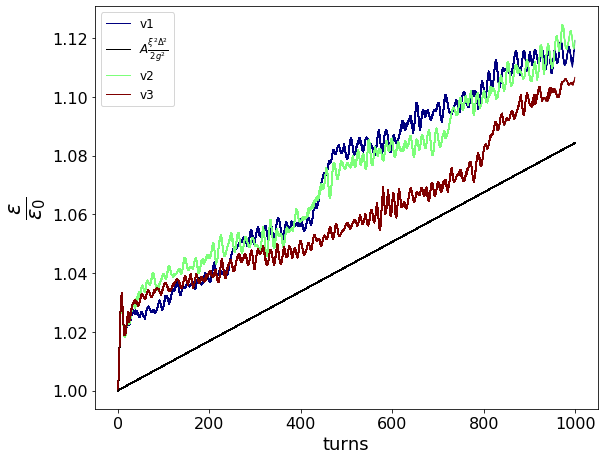

In [12]:
import matplotlib
fig, ax = plt.subplots()

jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,len(studies_names))))
#variables_list = [0.837, 0.845, 0.85]

turns_list = np.arange(0,1000)

# Parametrs of the study
Delta = 0.05#*sigma_px
gain = 0.2#*sigma_px
A =3  #p.168
ksi = 0.03#*sigma_px

turns_list = np.arange(0,turns)
theory_rate = A*((ksi**2)*((Delta**2))/(2*gain**2))


for index, study in enumerate(studies_names) :
    c1 = next(colors)
    df  = pd.read_pickle('./turn_by_turn_data/{}'.format(study))
    e_x = [] # list for the values of geometric emittance over turns
    for turn in range(turns):
        e_x.append(cmp_emit(df.at[turn,'x']/sqrt(twiss.beta_x), df.at[turn,'px']*sqrt(twiss.beta_x) ))
        if turn == 1:
            ax.plot(e_x/e_x[0], c = c1, label = variables_string_list[index])
            if study == studies_names[0]:
                plt.plot(turns_list, 1 + theory_rate*turns_list, label = r'$A\frac{\xi^2 \Delta^2}{2g^2} $', c = 'k')
            #ax.plot(e_x/e_x[0], c = c1, label = r'$Q_x$='+str(variables_list[index]))
        else:
            ax.plot(e_x/e_x[0], c = c1)
            plt.plot(turns_list, 1 + theory_rate*turns_list, c = 'k')
ax.set_xlabel('turns')
ax.set_ylabel(r'$\frac{\epsilon}{\epsilon_{0}}$',fontsize = 30)
#plt.ylabel(r'$\epsilon [m]}$',fontsize = 30)
#plt.ylim(-1.000025, 1.000025)
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)
plt.legend()
plt.tight_layout()
plt.savefig('./figures/emittances_test.png')

### Neglet the first 100 turns

FileNotFoundError: [Errno 2] No such file or directory: './turn_by_turn_data/Qx0.78_noise0.05_BB0.03_feedback0.2_betax115.75_H_particles15000_turns1000_v1.pkl'

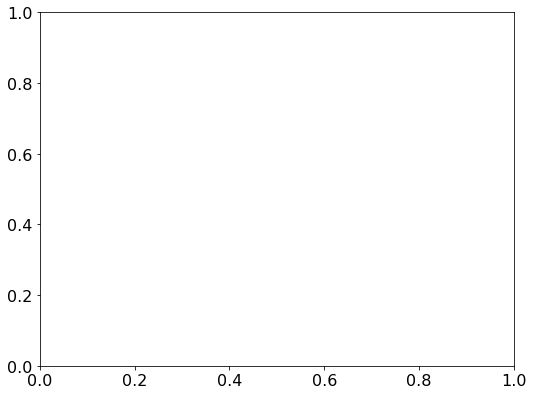

In [5]:
import matplotlib
fig, ax = plt.subplots()

jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,len(studies_names))))
#variables_list = [0.837, 0.845, 0.85]

excluded_turns = 100
turns_list_v2 = np.arange(0,turns- excluded_turns)


# Parametrs of the study
Delta = 0.05#*sigma_px
gain = 0.2#*sigma_px
A =3  #p.168
ksi = 0.03#*sigma_px

turns_list = np.arange(0,turns)
theory_rate = A*((ksi**2)*((Delta**2))/(2*gain**2))


for index, study in enumerate(studies_names) :
    c1 = next(colors)
    df  = pd.read_pickle('./turn_by_turn_data/{}'.format(study))
    e_x = [] # list for the values of geometric emittance over turns
    for turn in range(100, turns):
        e_x.append(cmp_emit(df.at[turn,'x']/sqrt(twiss.beta_x), df.at[turn,'px']*sqrt(twiss.beta_x) ))
        if turn == 100:
            ax.plot(e_x/e_x[0], c = c1, label = variables_string_list[index])
            if study == studies_names[0]:
                plt.plot(turns_list, 1 + theory_rate*turns_list, label = r'$A\frac{\xi^2 \Delta^2}{2g^2} $', c = 'k')
            #ax.plot(e_x/e_x[0], c = c1, label = r'$Q_x$='+str(variables_list[index]))
        else:
            ax.plot(e_x/e_x[0], c = c1)
            plt.plot(turns_list, 1 + theory_rate*turns_list, c = 'k')
ax.set_xlabel('turns')
ax.set_ylabel(r'$\frac{\epsilon}{\epsilon_{0}}$',fontsize = 30)
#plt.ylabel(r'$\epsilon [m]}$',fontsize = 30)
#plt.ylim(-1.000025, 1.000025)
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)
plt.legend()
plt.tight_layout()
plt.savefig('./figures/emittances_test.png')

### Tune shift with amplitude
- We need to store the data in groups of particles. 
- In our data frames are in groups of turns

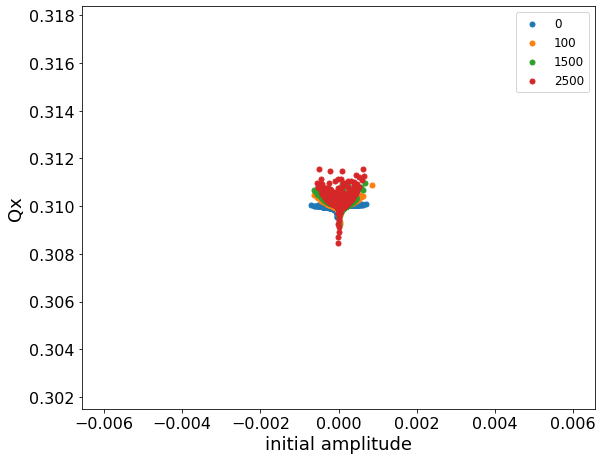

In [17]:
labels = ['0', '100','1500','2500']

for index, study in enumerate(studies_names) :
    df  = pd.read_pickle('./turn_by_turn_data/{}'.format(study))
    x_data = {}
    px_data = {}
    y_data = {}
    py_data = {}
    for particle in range(particles):
        x_data[particle] = []
        px_data[particle] = []
        y_data[particle] = []
        py_data[particle] = []
    for particle in range(particles):
        for turn in range(turns):
            x_data[particle].append(df.at[turn,'x'][particle])
            px_data[particle].append(df.at[turn,'px'][particle])
            y_data[particle].append(df.at[turn,'y'][particle])
            py_data[particle].append(df.at[turn,'py'][particle])
    lost_particles = []
    Qx_list = []
    Qy_list = []

    for particle in range(particles):
        if np.isnan(x_data[particle]).any() or np.isnan(px_data[particle]).any():
            lost_particles.append(particle)
            print('particle {} lost'.format(particle))
        else:        
            signal_x = x_data[particle] # normalise by derivation with beta function
            signal_y = y_data[particle] # normalise by derivation with beta function
            Qx_list.append(pnf.naff(signal_x, turns, 1, 0, False)[0][1])
            #Qy_list.append(pnf.naff(signal_y, turns, 1, 0, False)[0][1])
    plt.scatter(df.at[0,'x'], Qx_list, label = labels[index]) # the index 0 corresponds to turn


plt.xlabel('initial amplitude')
plt.ylabel('Qx')
#plt.ylim(0.04, 0.05)
plt.tight_layout()
plt.legend()
plt.savefig('test.png')